# This is a demo of how to use python notebook

to document your journey of researching "Evolutionary Dynamics: Exploring the Equations of Life"

For reference on LaTeX: https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/

For example, $f'(a) = \lim_{x \to \infty}\frac{f(x)-g(x)}{x-a}$

$$A = \begin{bmatrix} 0 & 1 & -1 \\ -1 & 0 & 1 \\ 1 & -1 & 0 \end{bmatrix}$$


# Chapter 2: What Evolution Is

## 2.2 Selection
### 2.2.2 Survival of the First, Survival of All

On page 19, 20

$\dot{x} = x(1-x)f(x)$,
where
$f(x) = ax^{c-1} - b(1-x)^{c-1}$

For $c\ne 1$, there exists exactly one other fixed point between 0 and 1, given by 
$$x^*=\frac{1}{1+ \sqrt[c-1]{a/b}}$$

Show that:

If $c<1$, the interior fixed point, $x^*$, is globally stable.

If $c>1$, the interior fixed point, $x^*$, is unstable.

# Chapter 4: Evolutionary Games

## 4.5 Replicator Dynamics
### 4.5.1 Two Strategies
On page 57,

In the interior, there can be at most one isolated fixed point. Such a fixed point exists 
if $(a_{11}-a_{21}(a_{12}-a_{22})<0$ .

Show the above statement (that is, such a fixed point exists if $(a-c)(b-d)<0$) is true in terms of the following equation (given in eq 4.5 on page 50)
$$ \dot{x} = x(1-x)[(a-b-c+d)x+b-d] $$



### 4.5.2 Three Strategies

Reproduce three trajectories in the paper-rock-scissors simplex (Figure 4.6, page 59).

In [1]:
import numpy as np


module loaded


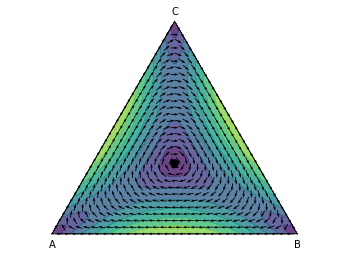

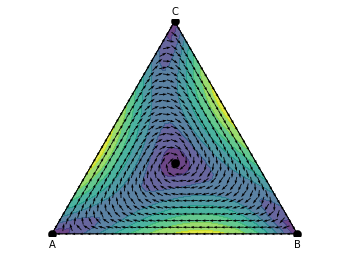

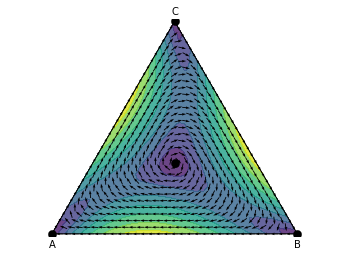

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from vendor import egtsimplex

#define function of x=[x0,x1,x2] and t to plot dynamics on simplex
def f_version_1(x, t):
    global A
    phi = (x.dot(A.dot(x)))
    x0dot = x[0]*(A.dot(x)[0]-phi)
    x1dot = x[1]*(A.dot(x)[1]-phi)
    x2dot = x[2]*(A.dot(x)[2]-phi)
    return [x0dot,x1dot,x2dot]

def f(x, t):
    global A
    phi = (x.dot(A.dot(x)))
    return x*(A.dot(x)-phi)


As = [np.array([[0,1,-1], [-1,0,1], [1,-1,0]]),
      np.array([[0,3,-1], [-1,0,3], [3,-1,0]]),
      np.array([[0,1,-3], [-3,0,1], [1,-3,0]]) ]

for i in range(3):
    A = As[i] # A is a global variable
    dynamics = egtsimplex.simplex_dynamics(f)
    
    fig, ax = plt.subplots()
    dynamics.plot_simplex(ax)

### 4.5.2 Three Strategies

on Page 59

The general rock-paper-scissors game is given by the payoff matrix
$$ A = \begin{bmatrix} 0 & -a_2 & b_3 \\ b_1 & 0 & -a_3 \\ -a_1 & b_2 & 0 \end{bmatrix} $$

Show:

(i) if the determinant of A is positive (that is, $a_1a_2a_3<b_1b_2b_3$,
then there exists a unique interior equilibrium that is globally stable.

(ii) if the determinant of A is negative (that is, $a_1a_2a_3>b_1b_2b_3$,
then there exists a unique interior equilibrium that is unstable.


## 4.9 Game Theory and Ecology
### 4.9.1 Predator and Prey

$$ \dot{x} = x(a-by) \\
\dot{y} = y(-c+dx)
$$

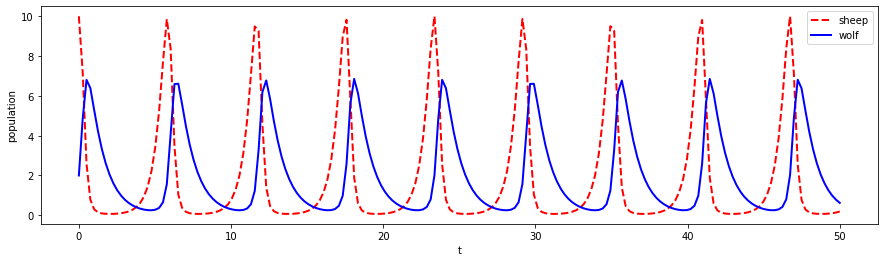

In [3]:
# plot the dynamics of the above equation

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint  # Ordinary Differential Equation

def f(xy, t):
    a, b, c, d = 2, 1, 1, .5
    x = xy[0]
    y = xy[1]
    dx = x*(a-b*y)
    dy = y*(-c+d*x)
    return [dx, dy]

t = np.linspace(0, 50, 200)
s0 = [10, 2]

s = odeint(f, s0, t)

plt.figure(figsize=(15, 4))

plt.plot(t,s[:,0],'r--', linewidth=2.0)
plt.plot(t,s[:,1],'b-', linewidth=2.0)
plt.xlabel("t")
plt.ylabel("population")
plt.legend(["sheep", "wolf"])

# Chapter 5: Prisoners of the Dilemma

## 5.3 Reactive Strategies
### 5.3.1 "In Silico" Evolution

On page 84

Let us perform an experiment to understand the evolutionary dynamics of reactive strategies. Use a random number generator that returns a uniform distribution on [0,1] to produce n=100 reactive strategies. Let us use the same payoff values that Axelrod chose for his two tournaments: R=3, T=5, S=0, and P=1. Calcuate the $n\times n$ payoff matrix using equation (5.17, given below). Insert the matrix into the replicator equation.

$$ E(S_1,S_2) = Rs_1s_2 + Ss_1(1-s_2) + T(1-s_1)s_2 + P(1-s_1)(1-s_2) $$

The replicator equation is in Figure 4.5 (page 56):

$$ \dot{x_i} = x_i[f_j(\vec{x}) - \phi(\vec{x})] $$
, where 
$$ \phi(\vec{x}) = \sum_i f_i(\vec{x})x_i $$

$$ f_i(\vec{x}) = \sum_{j=1}^n a_{ij}x_j$$

$$ \vec{x} = (x_1, x_2, ..., x_n)$$

Show the evolution of the above procedure with computer simulation
- Reference: Nowak, M. A. & K. Sigmund (1992). Tit for tat in heterogeneous populations. Nature 355: 250-253. DOI: 10.1038/355250a0  [PDF](https://ped.fas.harvard.edu/files/ped/files/nature92b_0.pdf)

In [4]:
np.set_printoptions(precision=3, suppress=True)

In [5]:
# create payoff matrix

R, S, T, P = 3, 0, 5, 1 # Reward, Suck, Temptation, Punishment
M = 3
N = M*M # total strategies in total

proba_list = np.linspace(0.001, .999, M)

debug = 0
# debug = 1

def payoff(p1, q1, p2, q2): # payoff of two strategies (p1, q1) vs (p2, q2)
    r1 = p1-q1
    if abs(r1)==1:
        p1 -= r1*0.0001
        r1 = p1-q1
    r2 = p2-q2
    if abs(r2)==1:
        p2 -= r2*0.0001
        r2 = p2-q2

    s1 = (q2*r1 + q1) / (1-r1*r2)
    s2 = (q1*r2 + q2) / (1-r1*r2)
    v1 = s1*s2
    v2 = s1*(1-s2)
    v3 = (1-s1)*s2
    v4 = (1-s1)*(1-s2)
    result = R*v1 + S*v2 + T*v3 + P*v4
    if debug == 2:
        print(p1, q1, p2, q2, r1, r2, s1, s2, v1, v2, v3, v4, result)
    return result


def compute_payoff_between_i_and_j(i, j): # both i and j are in the range of (0, 1, ...,99)
    i_row = int(i/M)
    i_col = i%M
    p1 = proba_list[i_row]
    q1 = proba_list[i_col]
    j_row = int(j/M)
    j_col = j%M
    p2 = proba_list[j_row]
    q2 = proba_list[j_col]
    
    expected_payoff = payoff(p1, q1, p2, q2)
    
    if debug:
        print(f'[i={i:02d}] ({i_row}, {i_col}) ({p1:.3f}, {q1:.3f}) vs. [j={j:02d}] ({j_row}, {j_col}) ({p2:.3f}, {q2:.3f})  payoff: {expected_payoff:.2f}' )
    return expected_payoff
    
    
payoff_matrix = np.zeros((N, N))

for i in range(N):
    if debug:
        inspection = N-M # TFT. Payoff is different from what I expected - initial action is not considered?
        inspection = 0 # ALLD
        # inspection = N-1 # ALLC

        if not i==inspection: continue
            
    for j in range(N):
#         if debug and not j==inspection: continue
            
        payoff_matrix[i, j] = compute_payoff_between_i_and_j(i, j)    

In [6]:
# inspection = 0 # ALLD
# inspection = N-1 # ALLC
# inspection = N-M # TFT. Payoff is different from what I expected - initial action is not considered?

if M==3:
    np.set_printoptions(precision=2, suppress=True)
    display(payoff_matrix)

array([[1.  , 3.  , 4.99, 1.  , 3.  , 4.99, 1.01, 3.  , 4.99],
       [0.5 , 1.89, 4.98, 1.32, 2.62, 4.99, 1.89, 3.08, 4.99],
       [0.  , 0.01, 2.25, 1.45, 2.25, 4.98, 2.25, 3.11, 4.99],
       [1.  , 2.32, 3.11, 1.01, 2.62, 3.48, 1.01, 3.11, 4.  ],
       [0.5 , 1.38, 2.25, 1.38, 2.25, 3.12, 2.25, 3.12, 4.  ],
       [0.  , 0.01, 0.01, 1.48, 1.88, 2.56, 2.55, 3.12, 4.  ],
       [1.  , 1.89, 2.25, 1.01, 2.25, 2.56, 2.25, 3.  , 3.  ],
       [0.5 , 1.08, 1.45, 1.45, 1.88, 2.12, 2.99, 3.  , 3.  ],
       [0.  , 0.01, 0.01, 1.5 , 1.5 , 1.5 , 3.  , 3.  , 3.  ]])

In [7]:
def f(x, t):
    payoff_vector = payoff_matrix.dot(x)
    phi = x.dot(payoff_vector)
#     print(f'{phi:.1f}', end=' ')
    dx = x*(payoff_vector - phi)
    return dx


t = np.linspace(0, 300, 120)
x_init = np.ones(N)/N

x_hist = odeint(f, x_init, t)

print(f'max freq: {x_hist.max():.2f}    min freq: {x_hist.min():.2f}')
print('x_hist.shape =', x_hist.shape)

import pandas as pd


pd.DataFrame(x_hist).round(2)[:30]

max freq: 1.00    min freq: 0.00
x_hist.shape = (120, 9)


,0,1,2,3,4,5,6,7,8
0,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11
1,0.39,0.22,0.04,0.13,0.07,0.02,0.09,0.04,0.01
2,0.60,0.14,0.01,0.13,0.03,0.00,0.08,0.02,0.00
3,0.70,0.07,0.00,0.12,0.01,0.00,0.08,0.01,0.00
4,0.74,0.03,0.00,0.12,0.01,0.00,0.10,0.01,0.00
5,0.74,0.02,0.00,0.11,0.00,0.00,0.13,0.00,0.00
6,0.69,0.01,0.00,0.10,0.00,0.00,0.19,0.00,0.00
7,0.57,0.01,0.00,0.08,0.00,0.00,0.33,0.00,0.00
8,0.26,0.01,0.00,0.04,0.00,0.00,0.68,0.01,0.00
9,0.03,0.00,0.00,0.00,0.00,0.00,0.89,0.07,0.00


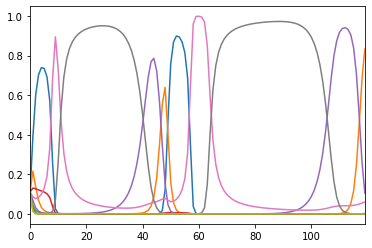

In [8]:
df = pd.DataFrame(x_hist[:, :])
df.plot(legend=False)#, figsize=(10, 4))

Text(0, 0.5, 'Average fitness over all strategies')

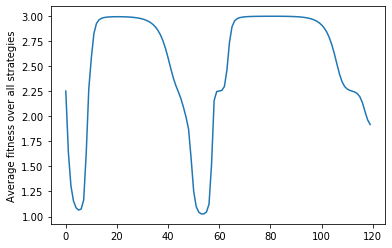

In [9]:
fitness = [x_hist[i,:].dot(payoff_matrix.dot(x_hist[i,:])) for i in range(len(x_hist))]
plt.plot(fitness)
plt.ylabel('Average fitness over all strategies')

x: [0.  0.  0.  0.5 0.5 0.5 1.  1.  1. ]
y: [0.  0.5 1.  0.  0.5 1.  0.  0.5 1. ]


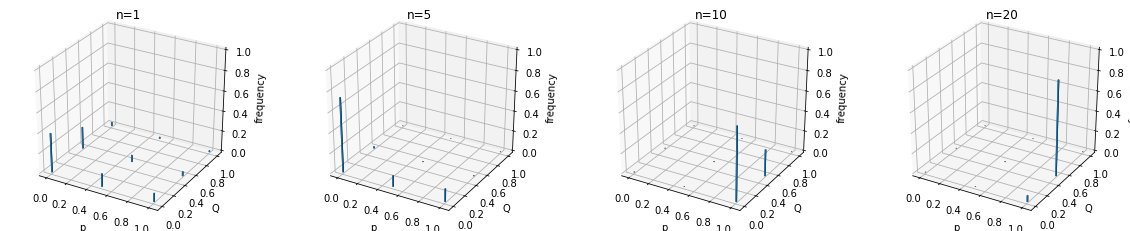

In [22]:
from mpl_toolkits.mplot3d import Axes3D 

x = y = np.linspace(0, 1, M)
x_, y_ = np.meshgrid(x, y)
x, y = x_.ravel(), y_.ravel()

x, y = y, x # this is because meshgrid and my treatment of index are orthogonal
print('x:', x)
print('y:', y)

fig = plt.figure(figsize=(20, 4))

if M==10:
    n_list = (40, 65, 67, 68, 75)
if M==3:
    n_list = (1, 5, 10, 20)

for i in range(len(n_list)):
    n = n_list[i]
    z = x_hist[n, :]
    
    ax = fig.add_subplot(1, len(n_list), i+1, projection='3d')
    bottom = np.zeros_like(x)
    width = depth = .01
    ax.bar3d(x, y, bottom, width, depth, z)
    ax.set_xlabel('p')
    ax.set_ylabel('Q')
    ax.set_zlabel('frequency')
    plt.title(f'n={n}')
    ax.set_zlim(0, 1)

In [11]:
if 0: # plot 3D surface
    from mpl_toolkits import mplot3d

    x = y = np.linspace(0, 1, M)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(20, 4))

    ns = (40, 65, 70, 75, 90)
    for i in range(len(ns)):
        n = ns[i]
        Z = x_hist[n,:].reshape((M,M))

        ax = fig.add_subplot(1, len(ns), i+1, projection='3d')             
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        ax.set_xlabel('P')
        ax.set_ylabel('Q')
        ax.set_zlim(0, 1)

**Approach Two: Use the simple approach as described in the following win-stay lose-shift part

## 5.5 Win-Stay Lose-Shift

- Reference: 
Nowak, M. A. & K. Sigmund (1993). A strategy of win-stay, lose-shift that outperforms tit-for-tat in the Prisoner’s Dilemma game. Nature 364: 56-58. DOI: 10.1038/364056a0 [PDF](https://ped.fas.harvard.edu/files/ped/files/nature93_0.pdf)

- Simulation approach (page 87)
    - start with a homogeneous population with strategy (1/2, 1/2, 1/2, 1/2)
    - every 100 generations, inject a small number of new population with a mutatant strategy, according to U-shaped distribution (which biases to the corner or bounday since most relevant strategies are around there)
